# **Import Data**

In [24]:
import pandas as pd
import numpy as np

In [25]:
data = '/content/sample_data/SMSSpamCollection'

In [30]:
SMS_data = pd.read_csv(data, sep='\t', names=['label', 'message'])
SMS_data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Data Preprocessing**

In [33]:
import re

def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'[@#]\w+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII (e.g., emojis)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

SMS_data['clean_message'] = SMS_data['message'].apply(clean_text)


In [34]:
SMS_data

,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u ...
5568,ham,Will ü b going to esplanade fr home?,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggestions
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


In [35]:
# Data Splitting
x =  SMS_data['clean_message']
y = SMS_data['label']

# **Vectorization for Feature Extraction**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
vectorizer = TfidfVectorizer(max_features=5000)
X_encoded = vectorizer.fit_transform(x)

In [37]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_array = X_encoded.toarray()

# **Training on Logistic Regression Model**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#  Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_array, y_encoded, test_size=0.2)

#  Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# **Predictions and Accuracy Test**

In [39]:
#  Make predictions
y_pred = model.predict(X_test)

#  Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 96.7713004484305


# **Testing**

In [47]:
SMS_data.tail()

,label,message,clean_message
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u ...
5568,ham,Will ü b going to esplanade fr home?,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggestions
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...
5571,ham,Rofl. Its true to its name,rofl its true to its name


In [49]:
#  Take  input
mail = ['this is the nd time we have tried contact u u have won the pound prize claim is easy call now only p per minute btnationalrate',
        'will b going to esplanade fr home',
        'pity was in mood for that soany other suggestions'
        'the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free',
        '	rofl its true to its name'
        ]

#  Preprocess it using the same vectorizer
for i in mail:
  vector = vectorizer.transform([i])

#  Predict
  prediction = model.predict(vector)
  predicted_label = label_encoder.inverse_transform(prediction)
#  Display result
  print("Actual mail:", mail)
  print("Predicted Email:", predicted_label[0])


Actual mail: ['this is the nd time we have tried contact u u have won the pound prize claim is easy call now only p per minute btnationalrate', 'will b going to esplanade fr home', 'pity was in mood for that soany other suggestionsthe guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free', '\trofl its true to its name']
Predicted Email: spam
Actual mail: ['this is the nd time we have tried contact u u have won the pound prize claim is easy call now only p per minute btnationalrate', 'will b going to esplanade fr home', 'pity was in mood for that soany other suggestionsthe guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free', '\trofl its true to its name']
Predicted Email: ham
Actual mail: ['this is the nd time we have tried contact u u have won the pound prize claim is easy call now only p per minute btnationalrate', 'will b going to esplanade fr home'

# **Confusion Matrix**

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

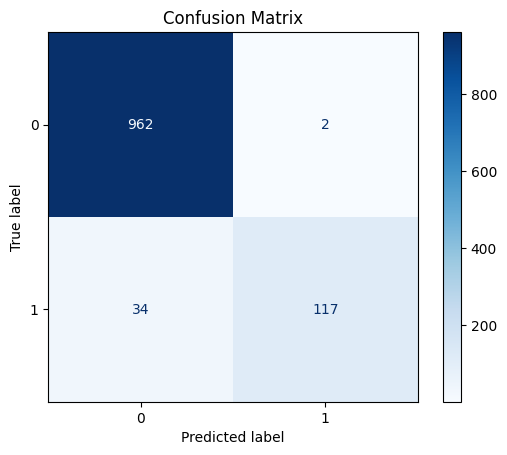

In [46]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()